# **Importing Libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# **Import dataset**

In [41]:
df=pd.read_csv('mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


# Data preprocessing and EDA(exploratory data analysis)

In [42]:
### check each column types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [43]:
#check dataset dimensions 
df.shape

(8675, 2)

In [44]:
## see the category counts
df.groupby(by='type').size()

type
ENFJ     190
ENFP     675
ENTJ     231
ENTP     685
ESFJ      42
ESFP      48
ESTJ      39
ESTP      89
INFJ    1470
INFP    1832
INTJ    1091
INTP    1304
ISFJ     166
ISFP     271
ISTJ     205
ISTP     337
dtype: int64

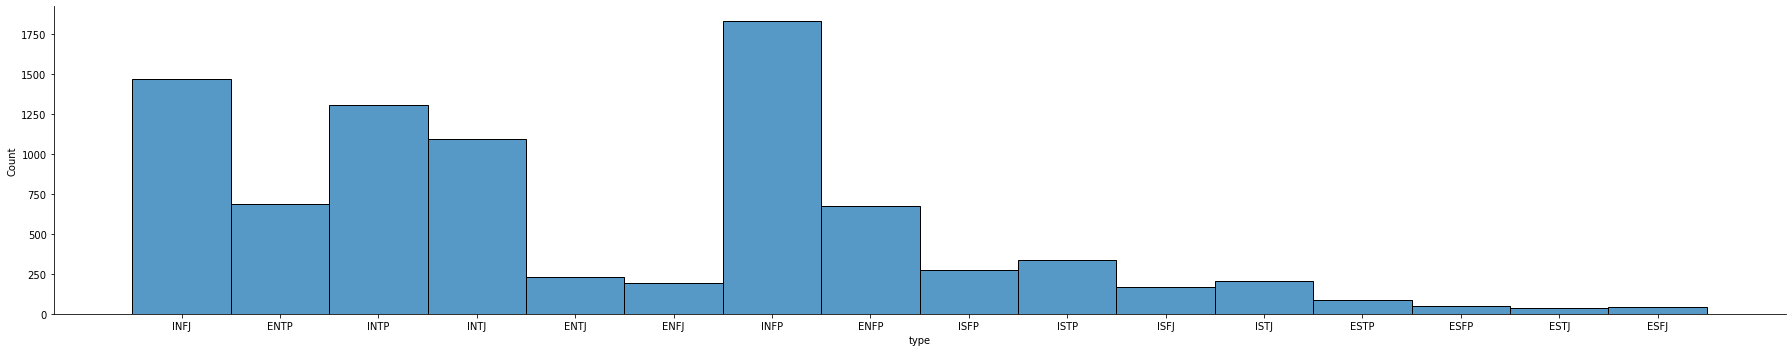

In [45]:
#### Check the each unique values count using histogram
sns.displot(df['type'],aspect=5)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

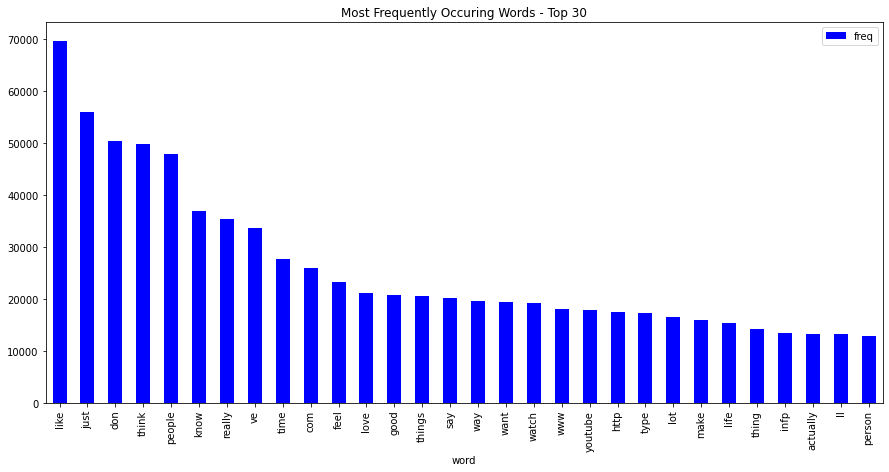

In [46]:
## Getting most frequently used words in the posts 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['posts'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from posts')

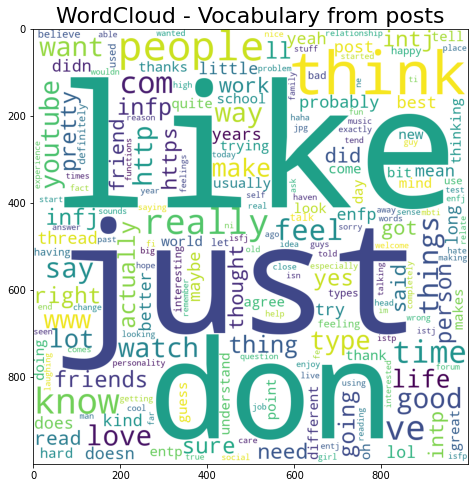

In [47]:
## Getting the cloud of words
# represent the frequency or the importance of each word
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from posts", fontsize = 22)

# Creating dependent And independent Variable for models

In [49]:
## Taking X the post column and y as the type column
X =df['posts']
y =df['type']

# Spliting the dataset into training and testing

In [50]:
### import command of for spliiting the dataset
from sklearn.model_selection import train_test_split

### split data 80% for the training our model and 20%  for testing our model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Bagging of words

In [51]:
CountVectorizer= TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
x_train=CountVectorizer.fit_transform(x_train)
x_test=CountVectorizer.transform(x_test)

# **Random Forest (RF)**

# Model training

In [52]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

# Model prediction

In [53]:
## getting prediction from model giving testing data
pred_RF=RF.predict(x_test)

# Model testing/evaluation

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        43
        ENFP       0.56      0.04      0.07       139
        ENTJ       0.00      0.00      0.00        35
        ENTP       0.79      0.08      0.14       138
        ESFJ       0.00      0.00      0.00        13
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        16
        INFJ       0.38      0.52      0.44       295
        INFP       0.34      0.86      0.49       356
        INTJ       0.58      0.24      0.34       239
        INTP       0.50      0.56      0.53       277
        ISFJ       0.00      0.00      0.00        35
        ISFP       0.00      0.00      0.00        47
        ISTJ       0.00      0.00      0.00        24
        ISTP       0.00      0.00      0.00        62

    accuracy                           0.40      1735
   macro avg       0.20   

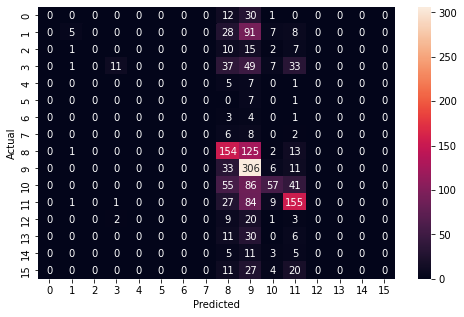

In [54]:
print(classification_report(y_test,pred_RF))
print(accuracy_score(y_test, pred_RF))
cm = confusion_matrix(y_test,pred_RF)
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap( cm,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()